# Hyperparameter optimization

In [1]:
import pandas as pd

df = pd.read_csv('data/housing_data_sample.csv', index_col='Id')
df.head()

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
Id,,,,,,,,
1,8450,2003,2,8,548,856,854,208500
2,9600,1976,2,6,460,1262,0,181500
3,11250,2001,2,6,608,920,866,223500
4,9550,1915,1,7,642,961,756,140000
5,14260,2000,2,9,836,1145,1053,250000


In [2]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
hyperparameters = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

In [3]:
from sklearn.model_selection import GridSearchCV

features = df.drop('SalePrice', axis=1)
targets = df['SalePrice']

gs = GridSearchCV(knn, hyperparameters, scoring='neg_mean_absolute_error', n_jobs=-1)
gs.fit(features, targets)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [4]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
-30069.78491711035


In [5]:
list(zip(gs.cv_results_['params'], gs.cv_results_['mean_test_score']))

[({'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, -31795.947260273977),
 ({'n_neighbors': 3, 'p': 1, 'weights': 'distance'}, -31226.346501552915),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}, -32975.90890410959),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, -32338.55514879399),
 ({'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}, -31175.630547945206),
 ({'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, -30438.96577645269),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, -31986.23561643836),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'distance'}, -31134.3566873946),
 ({'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}, -30935.39412915851),
 ({'n_neighbors': 7, 'p': 1, 'weights': 'distance'}, -30069.78491711035),
 ({'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}, -32122.704011741684),
 ({'n_neighbors': 7, 'p': 2, 'weights': 'distance'}, -31028.74010010045)]

## Random search

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

hyperparameters = {'n_neighbors': randint(low=3, high=20),
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
rs = RandomizedSearchCV(knn, hyperparameters, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
rs.fit(features, targets)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A5F0060C10>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_absolute_error')

In [7]:
print(rs.best_estimator_)
print(rs.best_params_)
print(rs.best_score_)

KNeighborsRegressor(n_neighbors=13, p=1, weights='distance')
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
-29845.646440602075


In [8]:
list(zip(rs.cv_results_['params'], rs.cv_results_['mean_test_score']))

[({'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}, -32363.609665144595),
 ({'n_neighbors': 17, 'p': 1, 'weights': 'distance'}, -30055.746440937754),
 ({'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}, -32363.609665144595),
 ({'n_neighbors': 13, 'p': 1, 'weights': 'distance'}, -29845.646440602075),
 ({'n_neighbors': 6, 'p': 2, 'weights': 'distance'}, -30997.193897640995),
 ({'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, -31986.23561643836),
 ({'n_neighbors': 4, 'p': 2, 'weights': 'distance'}, -31910.191127678332),
 ({'n_neighbors': 8, 'p': 2, 'weights': 'distance'}, -31181.05668402912),
 ({'n_neighbors': 3, 'p': 2, 'weights': 'distance'}, -32338.55514879399),
 ({'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}, -30972.516438356164)]

## Bayesian search

In [14]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

hyperparameters = {'n_neighbors': Integer(3, 20),
                  'weights': Categorical(['uniform', 'distance']),
                  'p': Categorical([1, 2])}
bs = BayesSearchCV(knn, hyperparameters, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42, n_iter=10)
bs.fit(features, targets)

BayesSearchCV(estimator=KNeighborsRegressor(), n_iter=10, n_jobs=-1,
              random_state=42, scoring='neg_mean_absolute_error',
              search_spaces={'n_neighbors': Integer(low=3, high=20, prior='uniform', transform='identity'),
                             'p': Categorical(categories=(1, 2), prior=None),
                             'weights': Categorical(categories=('uniform', 'distance'), prior=None)})

In [16]:
print(bs.best_estimator_)
print(bs.best_params_)
print(bs.best_score_)

KNeighborsRegressor(n_neighbors=11, weights='distance')
OrderedDict([('n_neighbors', 11), ('p', 2), ('weights', 'distance')])
-31143.98162060483


In [17]:
list(zip(bs.cv_results_['params'], bs.cv_results_['mean_test_score']))

[(OrderedDict([('n_neighbors', 10), ('p', 2), ('weights', 'uniform')]),
  -32311.303082191782),
 (OrderedDict([('n_neighbors', 17), ('p', 2), ('weights', 'distance')]),
  -31751.25385826393),
 (OrderedDict([('n_neighbors', 11), ('p', 2), ('weights', 'distance')]),
  -31143.98162060483),
 (OrderedDict([('n_neighbors', 17), ('p', 1), ('weights', 'uniform')]),
  -31297.367969379535),
 (OrderedDict([('n_neighbors', 17), ('p', 1), ('weights', 'uniform')]),
  -31297.367969379535),
 (OrderedDict([('n_neighbors', 15), ('p', 2), ('weights', 'distance')]),
  -31517.452750704768),
 (OrderedDict([('n_neighbors', 13), ('p', 2), ('weights', 'distance')]),
  -31348.48878798963),
 (OrderedDict([('n_neighbors', 12), ('p', 2), ('weights', 'distance')]),
  -31259.914106215525),
 (OrderedDict([('n_neighbors', 19), ('p', 2), ('weights', 'uniform')]),
  -33494.25966113915),
 (OrderedDict([('n_neighbors', 3), ('p', 2), ('weights', 'uniform')]),
  -32975.90890410959)]

# Learning curves

In [33]:
!start .

In [31]:
import matplotlib.pyplot as plt

In [36]:
?lc.show

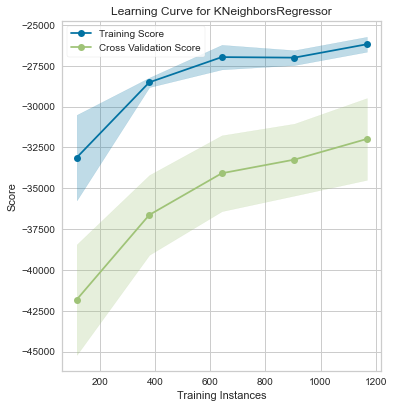

In [41]:
from yellowbrick.model_selection import LearningCurve

f = plt.figure(figsize=(5.5, 5.5))
lc = LearningCurve(knn, scoring='neg_mean_absolute_error')
lc.fit(features, targets)
plt.tight_layout(pad=1.25)
p = lc.show('B17030_13_02.png', dpi=300)

# Optimizing the Number of Features with ML Models

In [70]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
feature_selector = RFECV(lr, scoring='neg_mean_absolute_error')
feature_selector.fit(features, targets)

RFECV(estimator=LinearRegression(), scoring='neg_mean_absolute_error')

In [66]:
feature_selector.grid_scores_

array([-44963.06493189, -41860.3132655 , -37319.2626792 , -33319.79319284,
       -28524.60411086, -27607.29672974, -27315.23987193])

In [67]:
feature_selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [73]:
features.iloc[:, feature_selector.support_]

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF
Id,,,,,,,
1,8450,2003,2,8,548,856,854
2,9600,1976,2,6,460,1262,0
3,11250,2001,2,6,608,920,866
4,9550,1915,1,7,642,961,756
5,14260,2000,2,9,836,1145,1053
...,...,...,...,...,...,...,...
1456,7917,1999,2,7,460,953,694
1457,13175,1978,2,7,500,2073,0
1458,9042,1941,2,9,252,1188,1152


In [68]:
feature_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

# AutoML

In [78]:
from pycaret.regression import setup, compare_models

exp_clf = setup(df, target='SalePrice', numeric_features=['FullBath', 'TotRmsAbvGrd'])
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,22353.7346,1418647627.3685,36051.8438,0.7920,0.1765,0.1309,0.7260
et,Extra Trees Regressor,23329.3219,1441783942.2166,37082.8491,0.7837,0.1860,0.1388,0.0920
gbr,Gradient Boosting Regressor,23470.9520,1403920691.4596,36394.5036,0.7888,0.1839,0.1400,0.0420
rf,Random Forest Regressor,23566.2820,1474049881.5263,37618.4355,0.7771,0.1865,0.1392,0.1280
lightgbm,Light Gradient Boosting Machine,23745.3886,1460994079.8343,37406.6507,0.7785,0.1863,0.1392,0.1010
xgboost,Extreme Gradient Boosting,24041.0336,1414369004.8000,37156.4764,0.7838,0.1902,0.1417,0.3940
br,Bayesian Ridge,27917.6710,2162130678.3645,45052.1027,0.6708,0.2147,0.1609,0.0070
en,Elastic Net,28122.8166,2191205760.0000,45326.6930,0.6664,0.2168,0.1622,0.0050
llar,Lasso Least Angle Regression,28277.0974,2221374815.1595,45602.8589,0.6617,0.2181,0.1632,0.0060
ridge,Ridge Regression,28285.6875,2223337715.2000,45615.3258,0.6614,0.2184,0.1633,0.0070


In [80]:
from pycaret.regression import predict_model, save_model, load_model

predict_model(best, features)

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,Label
Id,,,,,,,,
1,8450,2003,2,8,548,856,854,199941.742839
2,9600,1976,2,6,460,1262,0,163448.468117
3,11250,2001,2,6,608,920,866,215085.135861
4,9550,1915,1,7,642,961,756,143582.485739
5,14260,2000,2,9,836,1145,1053,271139.757452
...,...,...,...,...,...,...,...,...
1456,7917,1999,2,7,460,953,694,185169.027645
1457,13175,1978,2,7,500,2073,0,224443.620240
1458,9042,1941,2,9,252,1188,1152,249094.237806


In [81]:
save_model(best, 'catboost_regressor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['FullBath',
                                                           'TotRmsAbvGrd'],
                                       target='SalePrice', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_nume...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SalePrice')),
                 ('fix_perfect', Remove_100(target='SalePrice')),
                 ('clean_names', Clean_C

In [87]:
cb_model = load_model('catboost_regressor')

Transformation Pipeline and Model Successfully Loaded


In [98]:
from pycaret.regression import tune_model

tuned_knn = tune_model(knn, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27546.3176,1741304002.7089,41728.9348,0.6972,0.2157,0.1634
1,32965.4216,2597362725.3726,50964.3280,0.5865,0.2509,0.1958
2,30374.2818,2057337199.7665,45357.8791,0.6862,0.2119,0.1512
3,28350.2213,1656986086.1066,40706.0940,0.7206,0.2078,0.1638
4,36596.5461,3689065659.1878,60737.6791,0.4779,0.2620,0.1988
5,38973.2105,3442995613.1897,58677.0450,0.5545,0.2629,0.2061
6,32036.9082,3046503121.7574,55195.1368,0.6521,0.2044,0.1603
7,37970.2218,2808882727.2243,52998.8936,0.5295,0.3015,0.2624
8,31238.8441,1600341296.6347,40004.2660,0.7149,0.2422,0.2000
9,32986.6757,2595224553.0895,50943.3465,0.5204,0.2703,0.2107


In [99]:
tuned_knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')